In [4]:
import numpy as np
# from scipy.special import stirling2
import matplotlib.pyplot as plt
import stirling
import graph_tool.all as gt
import networkx as nx

In [17]:
def recursive_summation(depth, current_Q):
    if depth == 2:
        return stirling.s2(current_Q, 2)
    summation = 0
    for an in range(depth, current_Q - 1):
        s = stirling.s2(current_Q, an)
        summation += s + recursive_summation(depth - 1, an)
    return summation

def num_trees(D,Q):
    if D==0 or D==1:
        return 1
    if D>=2:
        return recursive_summation(D, Q)


In [26]:
x = [num_trees(i,20) for i in range(0,20)]

In [30]:
x

[1,
 1,
 524287,
 51724157973017,
 52500605327224,
 52469231922580,
 51716596934947,
 47374254955478,
 36097577320523,
 20695839930622,
 8468345430568,
 2431443177055,
 489522346507,
 69344076637,
 6921185724,
 484670935,
 23498950,
 766956,
 15675,
 0]

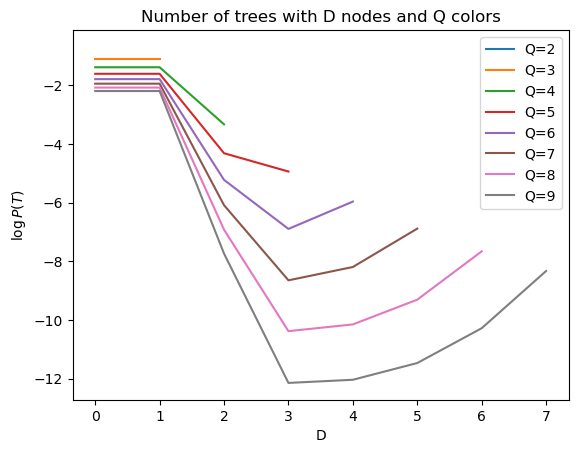

In [46]:
for Q in range(2,10):
    plt.plot([np.log(1/(Q*num_trees(i,Q))) for i in range(0,Q-1)],label=f'Q={Q}')
plt.legend()
plt.xlabel('D')
plt.ylabel('$\log P(T)$')
plt.title('Number of trees with D nodes and Q colors')
plt.show()

In [35]:
[num_trees(i,20) for i in range(0,19)]

[1,
 1,
 524287,
 51724157973017,
 52500605327224,
 52469231922580,
 51716596934947,
 47374254955478,
 36097577320523,
 20695839930622,
 8468345430568,
 2431443177055,
 489522346507,
 69344076637,
 6921185724,
 484670935,
 23498950,
 766956,
 15675]

In [2]:
g = gt.Graph(directed=False)

In [28]:
rgg = nx.random_geometric_graph(100, 0.19)

In [59]:
# Convert graph to graph tool graph
g = gt.Graph(directed=False)\
# Add vertices to graph tool graph
for node in rgg.nodes():
    g.add_vertex()
# Add edges to graph tool graph
for edge in rgg.edges():
    g.add_edge(g.vertex(edge[0]), g.vertex(edge[1]))
# for i in range(self.N):
#     vcolor[i] = 'white'
# Draw the graph with blue nodes
gt.graph_draw(g, output_size=(500, 500), vertex_fill_color=np.array([39,154,241,255])/255,output='random_geometric_graph.png')

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15dc1fcd0, at 0x17bb7b010>

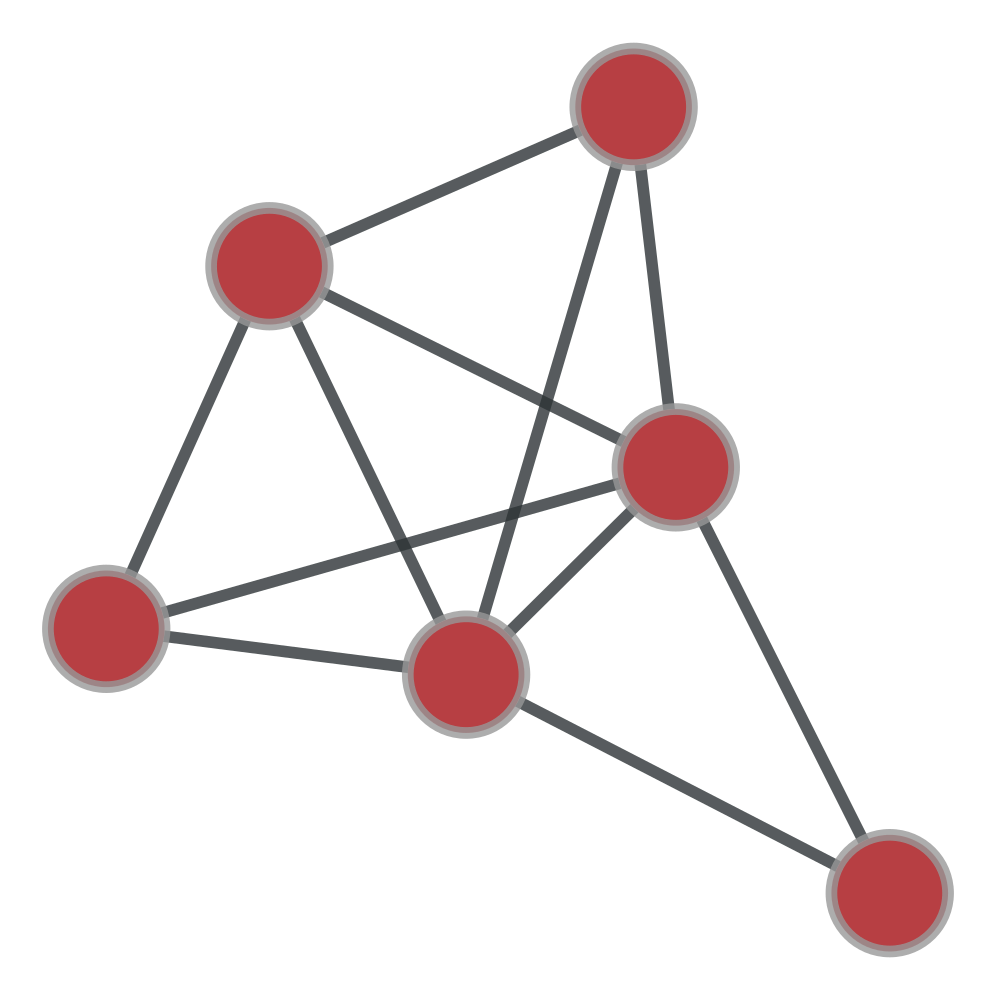

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17b6f1010, at 0x117bf2cd0>

In [42]:
rgg_egonet = nx.ego_graph(rgg, 19, radius=1)
rgg_egonet = nx.convert_node_labels_to_integers(rgg_egonet)
# Convert ego graph to graph tool graph
g_egonet = gt.Graph(directed=False)
# Add vertices to graph tool graph
for node in rgg_egonet.nodes():
    g_egonet.add_vertex()
# Add edges to graph tool graph
for edge in rgg_egonet.edges():
    g_egonet.add_edge(g_egonet.vertex(edge[0]), g_egonet.vertex(edge[1]))
# Draw the ego graph
gt.graph_draw(g_egonet, output_size=(500, 500))